In [10]:
    # import requests
# import datetime
# 
# url = "https://apis.data.go.kr/1613000/RTMSDataSvcAptTrade/getRTMSDataSvcAptTrade?"
# service_key = "01K5GY%2BOqRwRKCTe5O6JRPa3GMbKfjksVKi64n3xuOpFncW%2BGAebIxWQ3TDL21HwVCAWPw4p7mkpxuM0Mp3wLQ%3D%3D"
# search_date = "202101"
# area_code = "41281" ## 법정동코드는 앞 두자리는 시/도 단위, 앞 두자리 + 세자리는 시/군/구, 앞 두자리
# call_code = "LAWD_CD=" + area_code + "&" + \
# "DEAL_YMD=" + search_date + "&" + \
# "serviceKey=" + service_key + "&"
# res = requests.get (url + call_code)
# print(res.text)

<?xml version="1.0" encoding="utf-8" standalone="yes"?><response><header><resultCode>000</resultCode><resultMsg>OK</resultMsg></header><body><items><item><aptDong> </aptDong><aptNm>은빛마을6단지</aptNm><buildYear>1996</buildYear><buyerGbn> </buyerGbn><cdealDay> </cdealDay><cdealType> </cdealType><dealAmount>75,000</dealAmount><dealDay>13</dealDay><dealMonth>1</dealMonth><dealYear>2021</dealYear><dealingGbn> </dealingGbn><estateAgentSggNm> </estateAgentSggNm><excluUseAr>103.92</excluUseAr><floor>4</floor><jibun>936</jibun><landLeaseholdGbn>N</landLeaseholdGbn><rgstDate> </rgstDate><sggCd>41281</sggCd><slerGbn> </slerGbn><umdNm>화정동</umdNm></item><item><aptDong> </aptDong><aptNm>삼송힐스테이트</aptNm><buildYear>2013</buildYear><buyerGbn> </buyerGbn><cdealDay> </cdealDay><cdealType> </cdealType><dealAmount>70,000</dealAmount><dealDay>24</dealDay><dealMonth>1</dealMonth><dealYear>2021</dealYear><dealingGbn> </dealingGbn><estateAgentSggNm> </estateAgentSggNm><excluUseAr>74.13</excluUseAr><floor>11</floor

In [2]:
import xml.etree.ElementTree as ET
import pandas as pd

def get_items(response):
    root = ET.fromstring(response.content)
    item_list = []
    for child in root.find('body').find('items'):
        elements = child.findall('*')
        data = {}
        for element in elements:
            tag = element.tag.strip()
            text = element.text.strip()
            data[tag]=text
        item_list.append(data)
    return item_list

# items_list = get_items(res)
# items = pd.DataFrame(items_list)
# items.head()

In [2]:
code_file = "areacode.txt"
code = pd.read_csv(code_file, sep='\t', encoding='euc-kr')

In [3]:
code.columns = ['code', 'name', 'is_exist']
code = code[code['is_exist'] == '존재']

In [4]:
print(code['code'][0])
print(type(code['code'][0]))
print('\n')
code['code'] = code['code'].apply(str)
print(type(code['code'][0]))

1100000000
<class 'numpy.int64'>


<class 'str'>


In [5]:
#날짜값 변경하기
year = [str("%02d" %(y)) for y in range(2018,2022)]
month = [str("%02d" %(m)) for m in range(1,13)]
search_date_list = ["%s%s" %(y,m) for y in year for m in month]

In [6]:
#특정 '구'를 요청 날짜만큼 실거래데이터 저장하기
#"광진구"의 법정동 코드 5자리 추출
gu = "덕양구"
gu_code = code[(code['name'].str.contains(gu))]
gu_code = gu_code['code'].reset_index(drop=True)
gu_code = str(gu_code[0])[0:5]
print(gu_code)

41281


In [41]:
import requests
import datetime

def get_data(gu_code, search_date):
    url = "https://apis.data.go.kr/1613000/RTMSDataSvcAptTrade/getRTMSDataSvcAptTrade?"
    service_key = "01K5GY%2BOqRwRKCTe5O6JRPa3GMbKfjksVKi64n3xuOpFncW%2BGAebIxWQ3TDL21HwVCAWPw4p7mkpxuM0Mp3wLQ%3D%3D"
    page_no = "1"
    num_of_rows = "10000000"

    call_code = "serviceKey=" + service_key + "&" + \
            "LAWD_CD=" + gu_code + "&" + \
            "DEAL_YMD=" + search_date + "&" + \
            "pageNo=" + page_no + "&" + "numOfRows=" + num_of_rows

    res = requests.get(url + call_code)
    return res

In [40]:
#search_year_list = ["2019","2020","2021","2022","2023","2024"]
gu_code_list = ["41281", "41285", "41287"]
items_list = []
for gu_code in gu_code_list:
    for year in range(2019,2025):
        year = str(year)
        for month in range (1,13):
            month_str = str(month).zfill(2)
            year_month = year+month_str
            res = get_data(gu_code, year_month)
            items_list += get_items(res)
len(items_list)


62956

In [45]:
items = pd.DataFrame(items_list)
items.head()

,aptNm,buildYear,cdealDay,cdealType,dealAmount,dealDay,dealMonth,dealYear,dealingGbn,excluUseAr,floor,landLeaseholdGbn,sggCd,slerGbn,umdNm
0,햇빛주공22,1996,,,"17,900",28,1,2019,,39.99,13,N,41281,,행신동
1,햇빛마을19,1998,,,"33,500",29,1,2019,,84.98,3,N,41281,,행신동
2,푸른마을5단지,2007,,,"23,700",22,1,2019,,84.8265,10,N,41281,,고양동
3,햇빛주공(18-2),1998,,,"37,800",2,1,2019,,84.79,7,N,41281,,행신동
4,명지캐럿86,2007,,,"32,500",30,1,2019,,118.88,4,N,41281,,성사동


In [ ]:
items = items.drop(['aptDong', 'buyerGbn','estateAgentSggNm','jibun','rgstDate'], axis=1)

In [47]:
items['dealAmount'] = items['dealAmount'].str.replace(',', '').astype(int)

In [46]:
items['dealYearMonth'] = items['dealYear'] + items['dealMonth']
items.head()

,aptNm,buildYear,cdealDay,cdealType,dealAmount,dealDay,dealMonth,dealYear,dealingGbn,excluUseAr,floor,landLeaseholdGbn,sggCd,slerGbn,umdNm,dealYearMonth
0,햇빛주공22,1996,,,"17,900",28,1,2019,,39.99,13,N,41281,,행신동,20191
1,햇빛마을19,1998,,,"33,500",29,1,2019,,84.98,3,N,41281,,행신동,20191
2,푸른마을5단지,2007,,,"23,700",22,1,2019,,84.8265,10,N,41281,,고양동,20191
3,햇빛주공(18-2),1998,,,"37,800",2,1,2019,,84.79,7,N,41281,,행신동,20191
4,명지캐럿86,2007,,,"32,500",30,1,2019,,118.88,4,N,41281,,성사동,20191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62951,미주(19-8),1989,,,"11,000",1,8,2024,중개거래,57.5,5,N,41287,개인,일산동,20248
62952,후곡마을(주공),1995,,,"36,000",3,8,2024,중개거래,68.13,6,N,41287,개인,일산동,20248
62953,문촌마을10단지동부,1996,,,"40,000",2,8,2024,직거래,73.718,23,N,41287,개인,주엽동,20248
62954,동문굿모닝힐3,2003,,,"31,000",2,9,2024,중개거래,84.2747,8,N,41287,개인,덕이동,20249


In [42]:
items.to_csv('goyang_apt_transaction.csv', index=True, encoding='utf-8-sig')

In [10]:
items.dtypes

aptDong             object
aptNm               object
buildYear           object
buyerGbn            object
cdealDay            object
cdealType           object
dealAmount          object
dealDay             object
dealMonth           object
dealYear            object
dealingGbn          object
estateAgentSggNm    object
excluUseAr          object
floor               object
jibun               object
landLeaseholdGbn    object
rgstDate            object
sggCd               object
slerGbn             object
umdNm               object
dealYearMonth       object
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

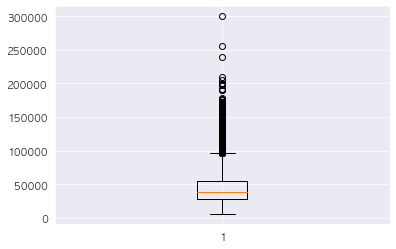

In [52]:
items_dealamount_float = items['dealAmount'].astype(float)
plt.boxplot(items['dealAmount'])
plt.show

(-3.4000000000000004, 71.4) (30235.773250853243, 63774.48698805461)


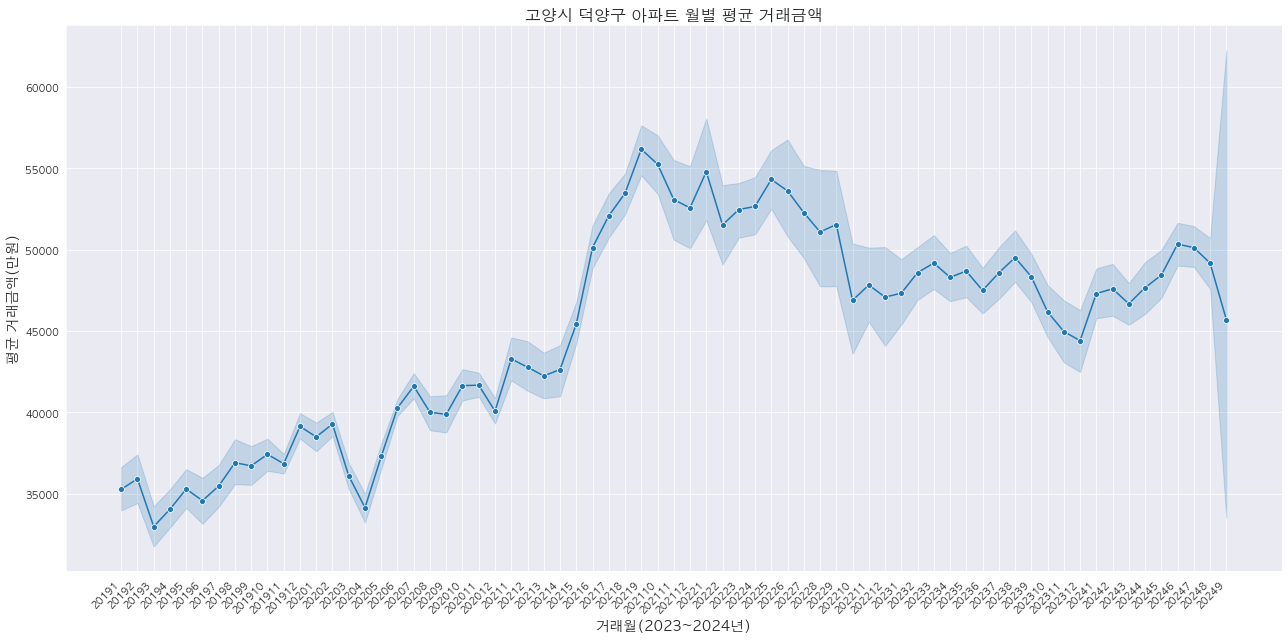

In [51]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import pandas as pd

rc('font', family = 'AppleGothic')

#plt.style.use('rcParams')
plt.figure(figsize=(18, 9))
sns.lineplot(data=items, x='dealYearMonth', y='dealAmount', marker='o')
plt.title('고양시 덕양구 아파트 월별 평균 거래금액', fontsize=16)
plt.xlabel('거래월(2023~2024년)', fontsize=14)
plt.ylabel('평균 거래금액(만원)', fontsize=14)
plt.xticks(rotation=45, ha='right')
#plt.yticks(rotation=45, ha='right')
plt.tight_layout()
print(plt.xlim(), plt.ylim())
plt.show()